In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
train = pd.read_csv('/content/train_ctrUa4K.csv')
test = pd.read_csv('/content/test_lAUu6dG.csv')

In [43]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [44]:
#Exploratory Data Analysis
print("Train Data Info:")
print(train.info())
print("\nTrain Data Description:")
print(train.describe())
print("\nTrain Data Head:")
print(train.head())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Train Data Description:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amoun

In [45]:
print(train.isna().sum())
print('\n\n',test.isna().sum())
print(test.info())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         35

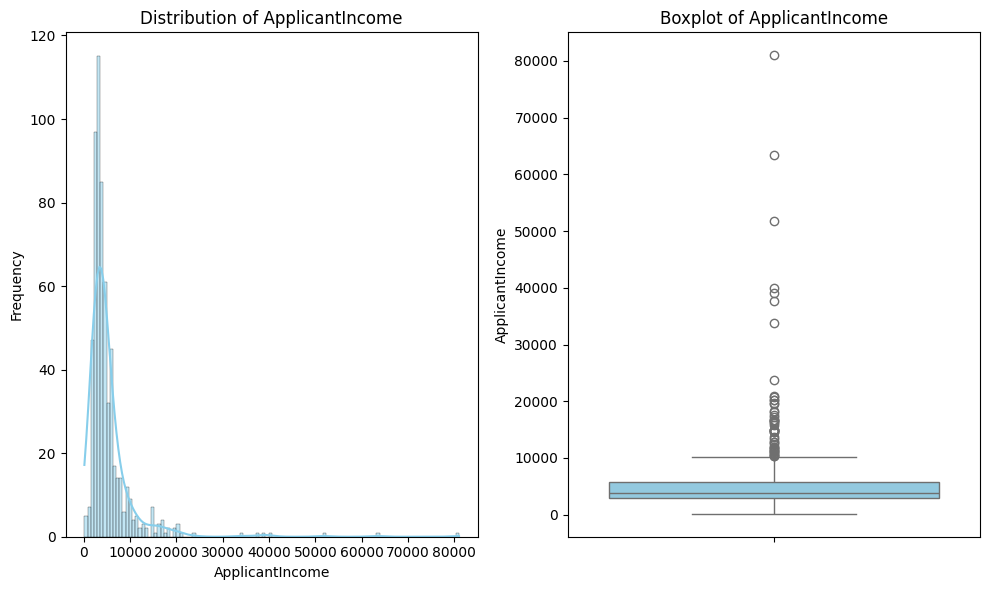

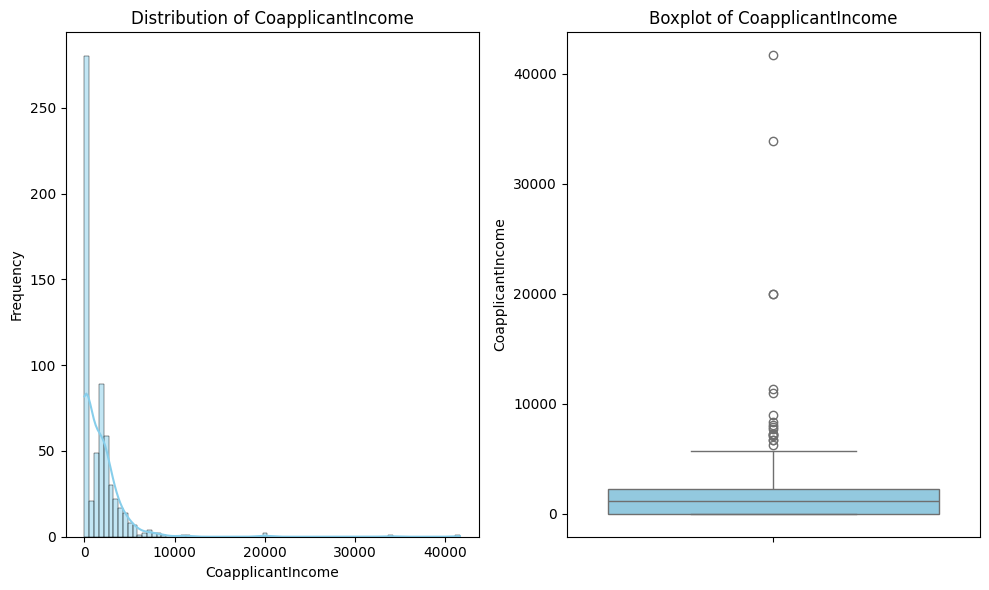

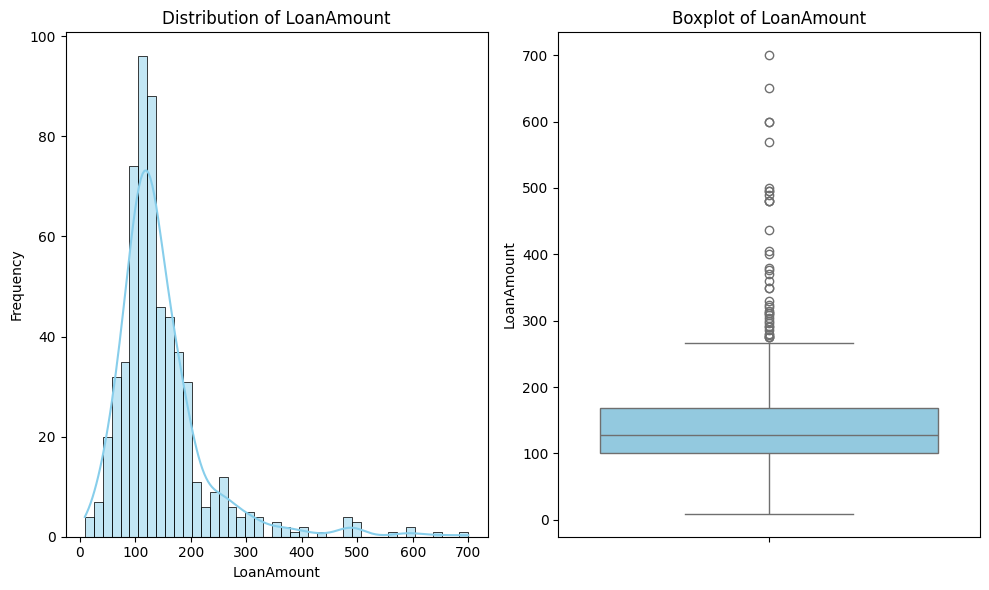

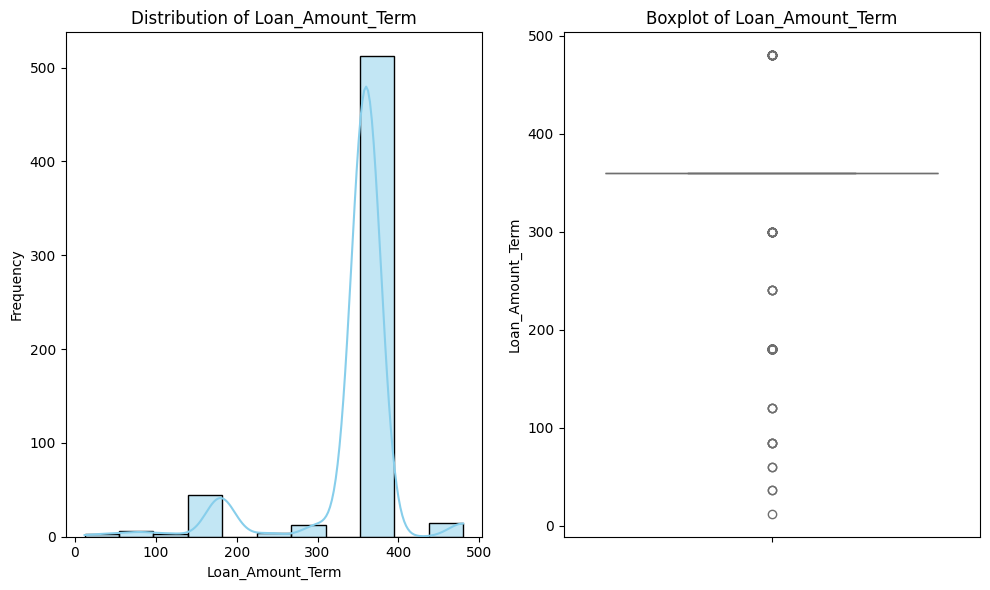

In [48]:
# Explore distributions of numerical variables using histograms and box plots
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(train[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=train[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

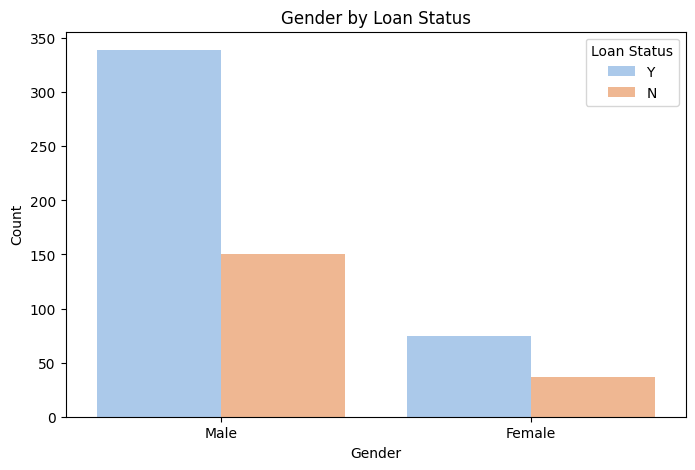

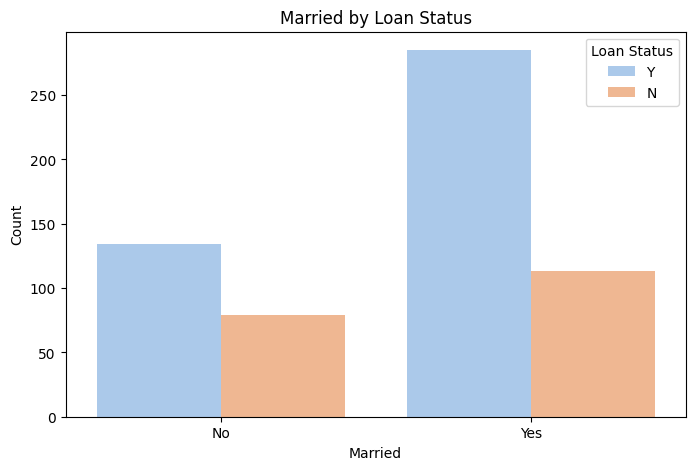

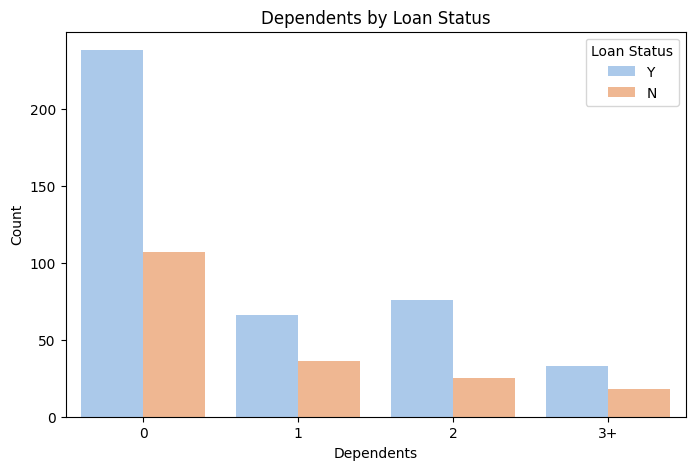

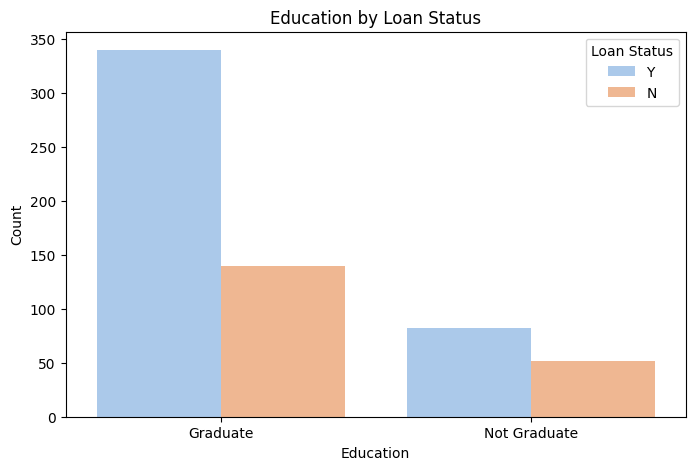

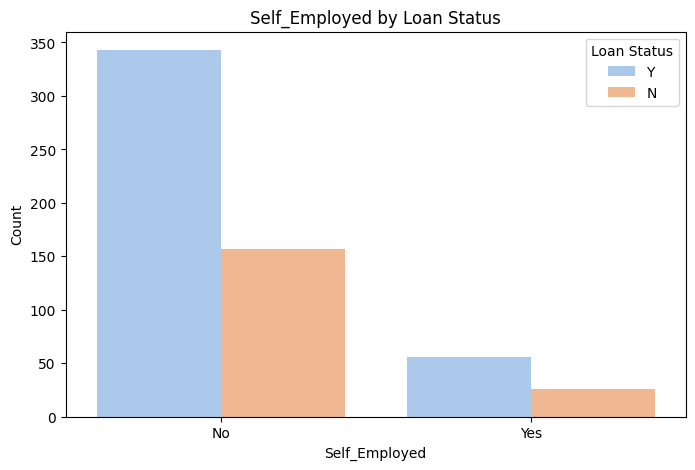

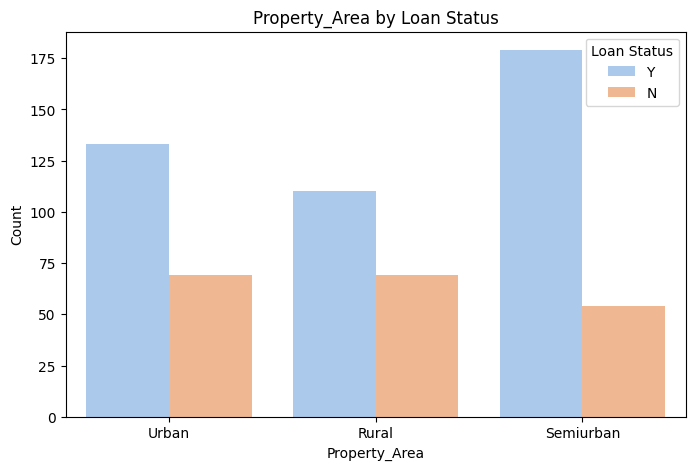

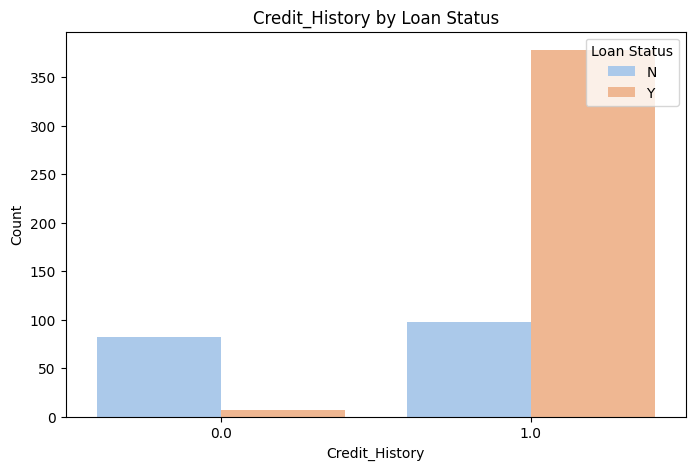

In [49]:
# Analyze relationships between features and the target variable (Loan_Status)
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='Loan_Status', data=train, palette='pastel')
    plt.title(f'{feature} by Loan Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right')
    plt.show()

## preprocessing on train set

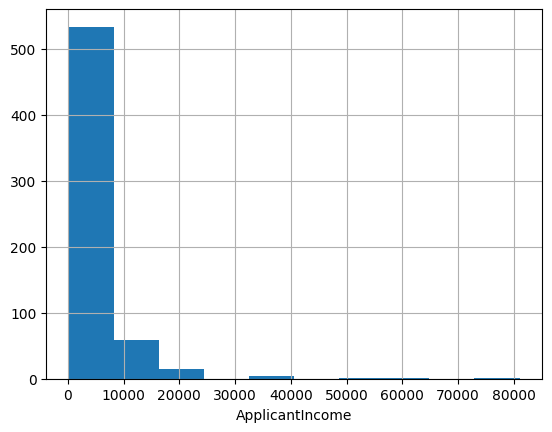

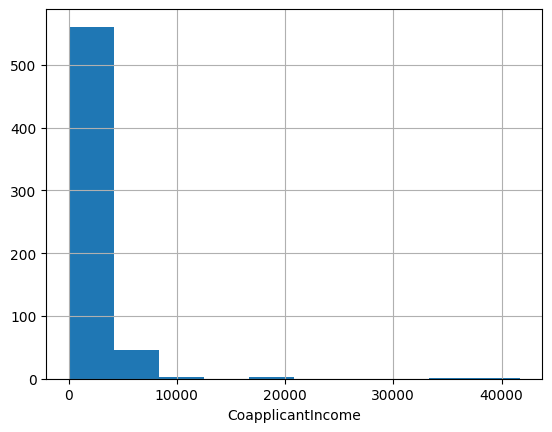

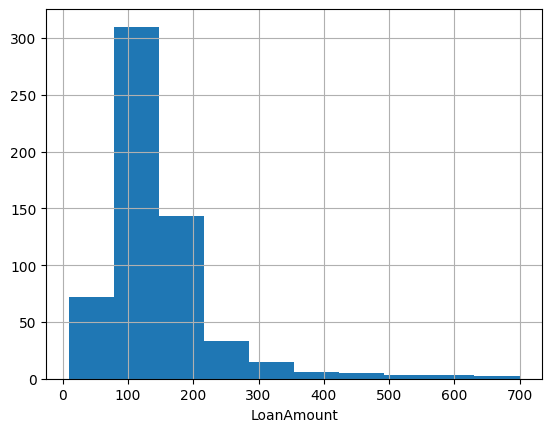

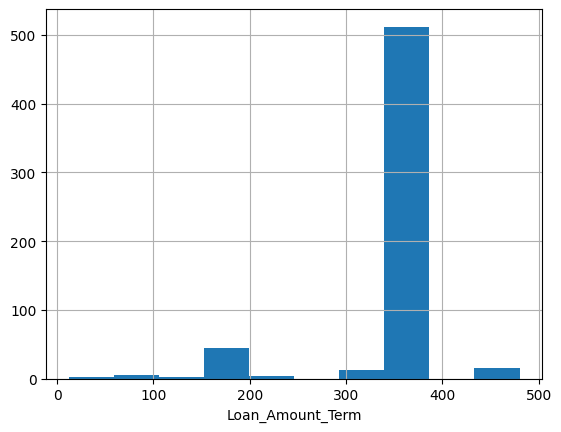

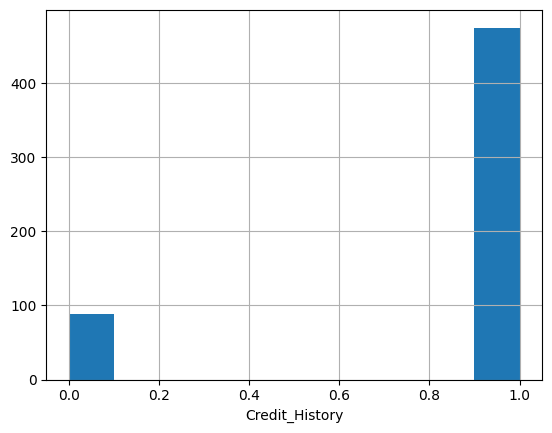

In [5]:
freq_data = train.select_dtypes(['float64', 'int64'])
for i in freq_data:
  train[i].hist()
  plt.xlabel(i)
  plt.show()

In [6]:
#using mode to fill nan in object columns
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])

#as seen on plots, LoanAmount, Loan_Amount_Term and Credit_History are skewed data, so use median to fill nan
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].median())

In [7]:
train.drop(['Loan_ID'], axis = 1, inplace = True) #irrelevant feature

splitting to dependent and independent variables to do preprocessing

In [8]:
y = train['Loan_Status']
X = train.drop(['Loan_Status'], axis = 1)

In [9]:
#label encoding all object datas
from sklearn.preprocessing import LabelEncoder
x_le = LabelEncoder()
for i in X.select_dtypes('object'):
  X[i] = x_le.fit_transform(X[i])

In [10]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [11]:
#minmax scaling for normalising all column values
from sklearn.preprocessing import MinMaxScaler
x_mmsc = MinMaxScaler()
data_model = x_mmsc.fit(X)
X_scaled = data_model.transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [12]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [13]:
X_scaled.columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

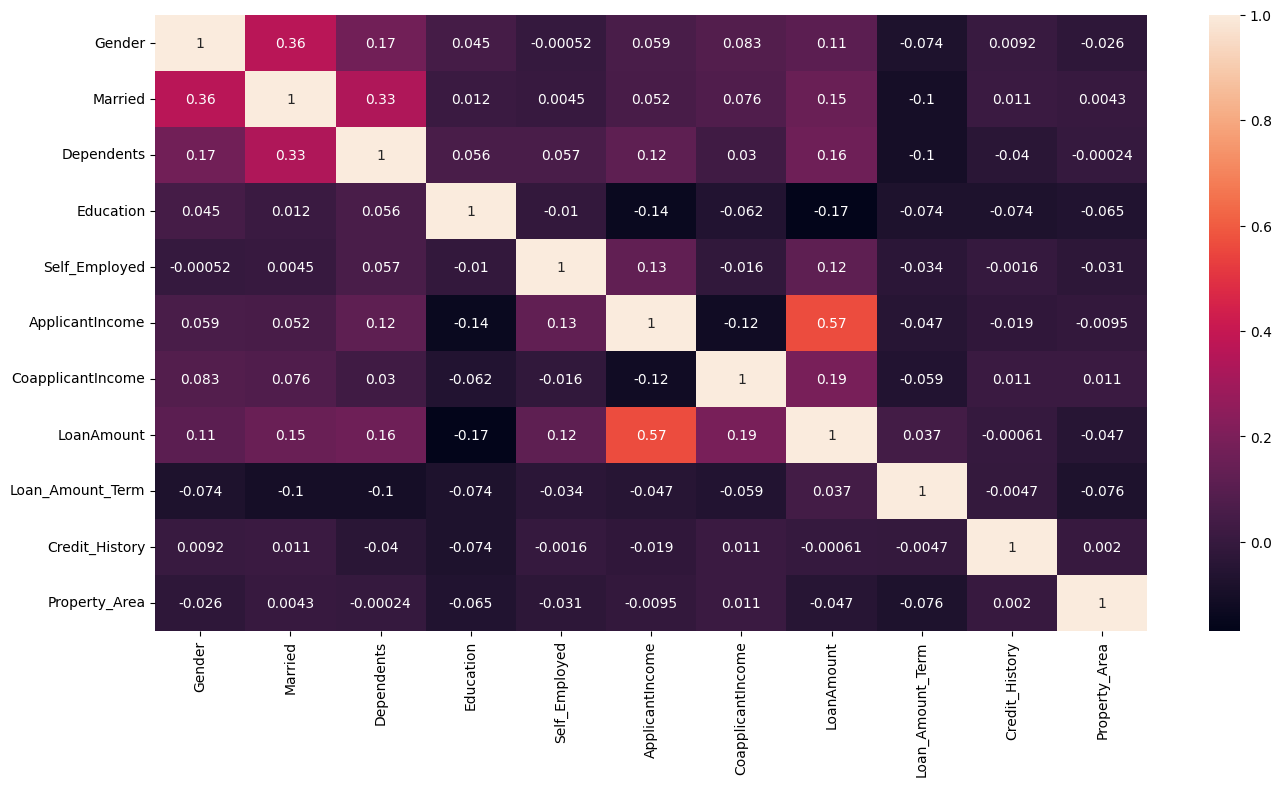

In [14]:
plt.figure(figsize = (16,8))
sns.heatmap(X_scaled.corr(), annot = True)
plt.show()

## preprocessing on test set

In [15]:
#using mode to fill nan in object columns
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])

#as seen on plots, LoanAmount, Loan_Amount_Term and Credit_History are skewed data, so use median to fill nan
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].median())

In [16]:
test.drop(['Loan_ID'], axis = 1, inplace = True) #irrelevant feature

In [17]:
#label encoding all object datas
for i in test.select_dtypes('object'):
  test[i] = x_le.fit_transform(test[i])

In [18]:
#minmax scaling for normalising all column values
data_model_test = x_mmsc.fit(test)
test_scaled = data_model_test.transform(test)
test_scaled = pd.DataFrame(test_scaled)

In [19]:
test_scaled.columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

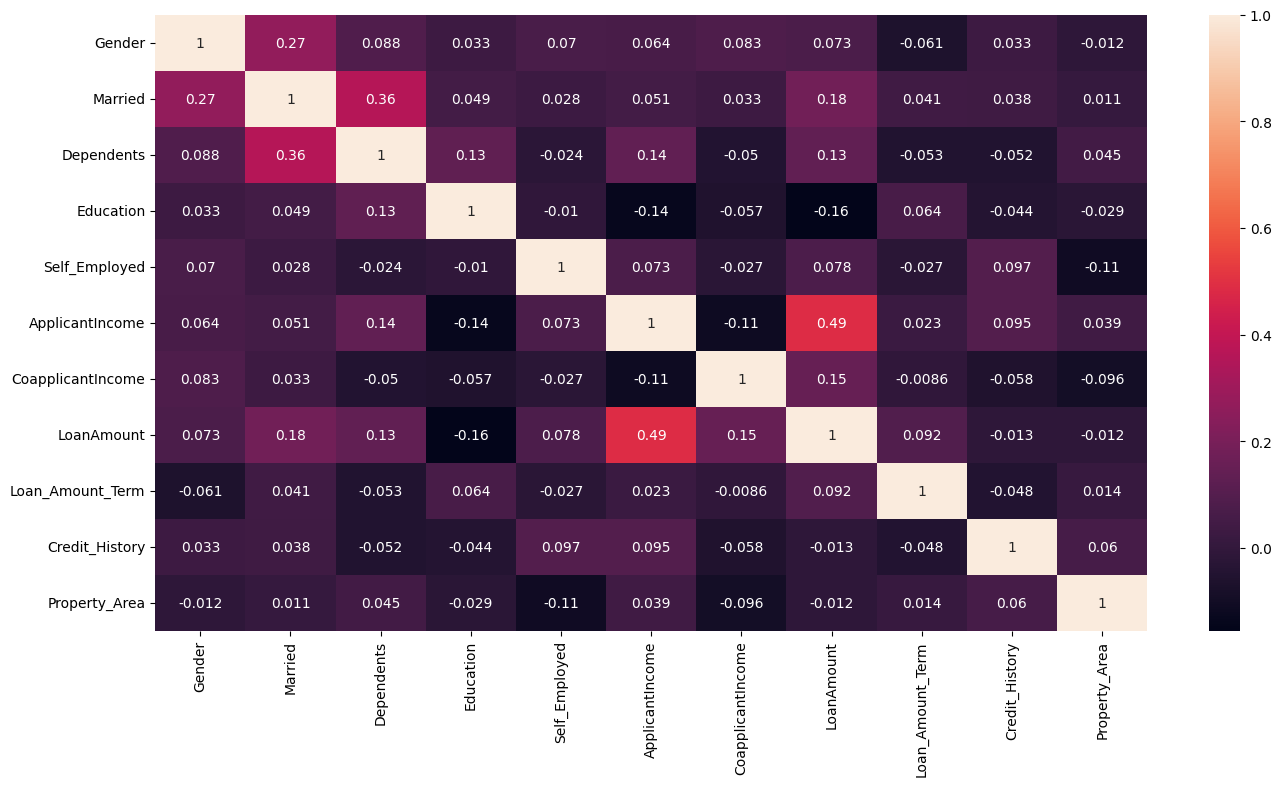

In [20]:
plt.figure(figsize = (16,8))
sns.heatmap(test_scaled.corr(), annot = True)
plt.show()

## Train-Test splitting

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 0)

## Model Building

1. k-NN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
metric_k =[]
neighbors = np.arange(3,15)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
for k in neighbors:
  classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski', p =2)
  classifier.fit(X_train, y_train)
  y_pred_knn = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'Accuracy')

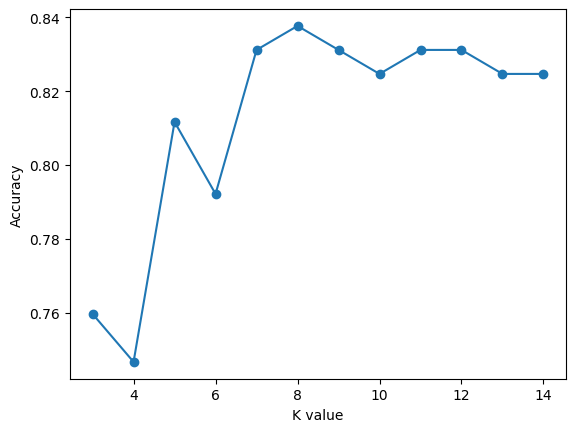

In [24]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')

In [25]:
#found that maximum accuracy is when neighbor value is 8
classifier= KNeighborsClassifier(n_neighbors=8,metric='minkowski', p =2)
knn_model = classifier.fit(X_train, y_train)
y_pred_knn = classifier.predict(X_test)
print('Model score in k-NN', knn_model.score(X_test, y_test))

Model score in k-NN 0.8376623376623377


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits = 10)
cv_score_knn = cross_val_score(classifier, X_scaled,y, cv = stratified_cv)
print(cv_score_knn)
print(cv_score_knn.mean())

[0.80645161 0.83870968 0.75806452 0.74193548 0.78688525 0.78688525
 0.8852459  0.75409836 0.7704918  0.81967213]
0.794843997884717


2. Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
lr_model = clf.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print('Model score in LR: ',lr_model.score(X_test, y_test))

Model score in LR:  0.8311688311688312


In [28]:
cv_score_lr = cross_val_score(clf, X_scaled,y, cv = stratified_cv)
print(cv_score_lr)
print(cv_score_lr.mean())

[0.80645161 0.82258065 0.77419355 0.75806452 0.78688525 0.78688525
 0.86885246 0.85245902 0.80327869 0.83606557]
0.8095716552088842


3. Decision tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_cl = DecisionTreeClassifier(random_state =0)
dt_model = dt_cl.fit(X_train, y_train)
y_pred_dt = dt_cl.predict(X_test)
print('Model score in DecisionTree', dt_model.score(X_test, y_test))

Model score in DecisionTree 0.7272727272727273


In [30]:
cv_score_dt = cross_val_score(dt_cl, X_scaled,y, cv = stratified_cv)
print(cv_score_dt)
print(cv_score_dt.mean())

[0.75806452 0.67741935 0.64516129 0.67741935 0.68852459 0.72131148
 0.80327869 0.6557377  0.72131148 0.6557377 ]
0.7003966155473293


4. Random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(random_state = 0, n_estimators=20, max_depth = 20, criterion='entropy')
rf_model = rf_cl.fit(X_train, y_train)
y_pred_rf = rf_cl.predict(X_test)
print('Model score in RandomForest', rf_model.score(X_test, y_test))

Model score in RandomForest 0.8246753246753247


In [32]:
cv_score_rf = cross_val_score(rf_cl, X_scaled,y, cv = stratified_cv)
print(cv_score_rf)
print(cv_score_rf.mean())

[0.72580645 0.77419355 0.72580645 0.74193548 0.78688525 0.80327869
 0.91803279 0.75409836 0.7704918  0.83606557]
0.7836594394500265


we can see that Logitic Regression and k-NN gives the maximum model score

Predicting on test dataset

In [33]:
#prediction using LogisticRegression model
Y_PRED = clf.predict(test_scaled)

loading submission file to enter predicted data

In [34]:
sub_data = pd.read_csv('/content/sample_submission_49d68Cx.csv')

In [35]:
sub_data.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [36]:
sub_data['Loan_Status'] = Y_PRED

In [37]:
sub_data['Loan_Status'].value_counts()

Loan_Status
Y    308
N     59
Name: count, dtype: int64

In [50]:
sub_data.to_csv('submission_data.csv', index = False)